## Predicting Cardiovascular Disease

#### In this dataset, the 'target' variable is a binary variable we are trying to predict. Conventional naming should be 0 = no disease, 1 = disease, however, this dataset was provided with the description of these values being switched so that 0 = disease, 1 = no disease. This was not changed before the analysis.

In [141]:
#importing libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats


#importing dataset into dataframe
data = pd.read_csv(r'C:\Users\karol\Desktop\data analyst\caltech bootcmap\course 6 - machine learning\project (healthcare)\healthcare data.csv', dtype = {'Ferry Direction' : str, "Ferry Terminal Name" : str})

#inserted variable descriptions

"""
age: The person's age in years
sex: The person's sex (1 = male, 0 = female)
cp: chest pain type
    Value 0: asymptomatic
    Value 1: atypical angina
    Value 2: non-anginal pain
    Value 3: typical angina
trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)
chol: The person's cholesterol measurement in mg/dl
fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
restecg: resting electrocardiographic results
    Value 0: showing probable or definite left ventricular 	hypertrophy by Estes' criteria
    Value 1: normal
    Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
thalach: The person's maximum heart rate achieved
exang: Exercise induced angina (1 = yes; 0 = no)
oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot.)
slope: the slope of the peak exercise ST segment (0: downsloping; 1: flat; 2: upsloping)
ca: The number of major vessels (0-3)
thal: Results of the blood flow observed via the radioactive dye.
    Value 1: fixed defect (no blood flow in some part of the heart)
    Value 2: normal blood flow
    Value 3: reversible defect (a blood flow is observed but it is not normal)
target : 0 = disease, 1 = no disease

"""

"\nage: The person's age in years\nsex: The person's sex (1 = male, 0 = female)\ncp: chest pain type\n    Value 0: asymptomatic\n    Value 1: atypical angina\n    Value 2: non-anginal pain\n    Value 3: typical angina\ntrestbps: The person's resting blood pressure (mm Hg on admission to the hospital)\nchol: The person's cholesterol measurement in mg/dl\nfbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)\nrestecg: resting electrocardiographic results\n    Value 0: showing probable or definite left ventricular \thypertrophy by Estes' criteria\n    Value 1: normal\n    Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)\nthalach: The person's maximum heart rate achieved\nexang: Exercise induced angina (1 = yes; 0 = no)\noldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot.)\nslope: the slope of the peak exercise ST segment (0: downsloping; 1: flat; 2: upsloping)\nca

In [2]:
data.shape

(303, 14)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
data.isna().sum(axis=0)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
#there are no null values

In [6]:
#return any duplicate rows

data[data.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [7]:
#removing duplicated rown
data = data.drop(164)

In [8]:
#checking that there aren't any duplicates after dropping the above one
data.duplicated().unique()

array([False])

In [9]:
#checking measures of central tendency and exploring distributions of data
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
'''
categorical variables are:

sex
cp
fbs
restecg
exang
slope
ca
thal
target
'''

'\ncategorical variables are:\n\nsex\ncp\nfbs\nrestecg\nexang\nslope\nca\nthal\ntarget\n'

## Exploratory Data Analysis

Text(0.5, 1.0, 'Disease (0) vs Non-Disease (1) Distribution')

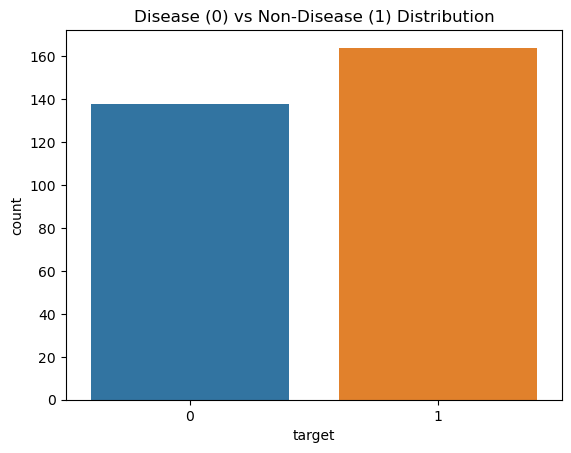

In [11]:
#visualizing the target distribution: 0= CVD 1= no CVD
sns.countplot(data=data, x='target')
plt.title("Disease (0) vs Non-Disease (1) Distribution")

In [12]:
#cardiovascular disease is less likely

Text(0.5, 1.0, 'Disease or No-Disease Distribution')

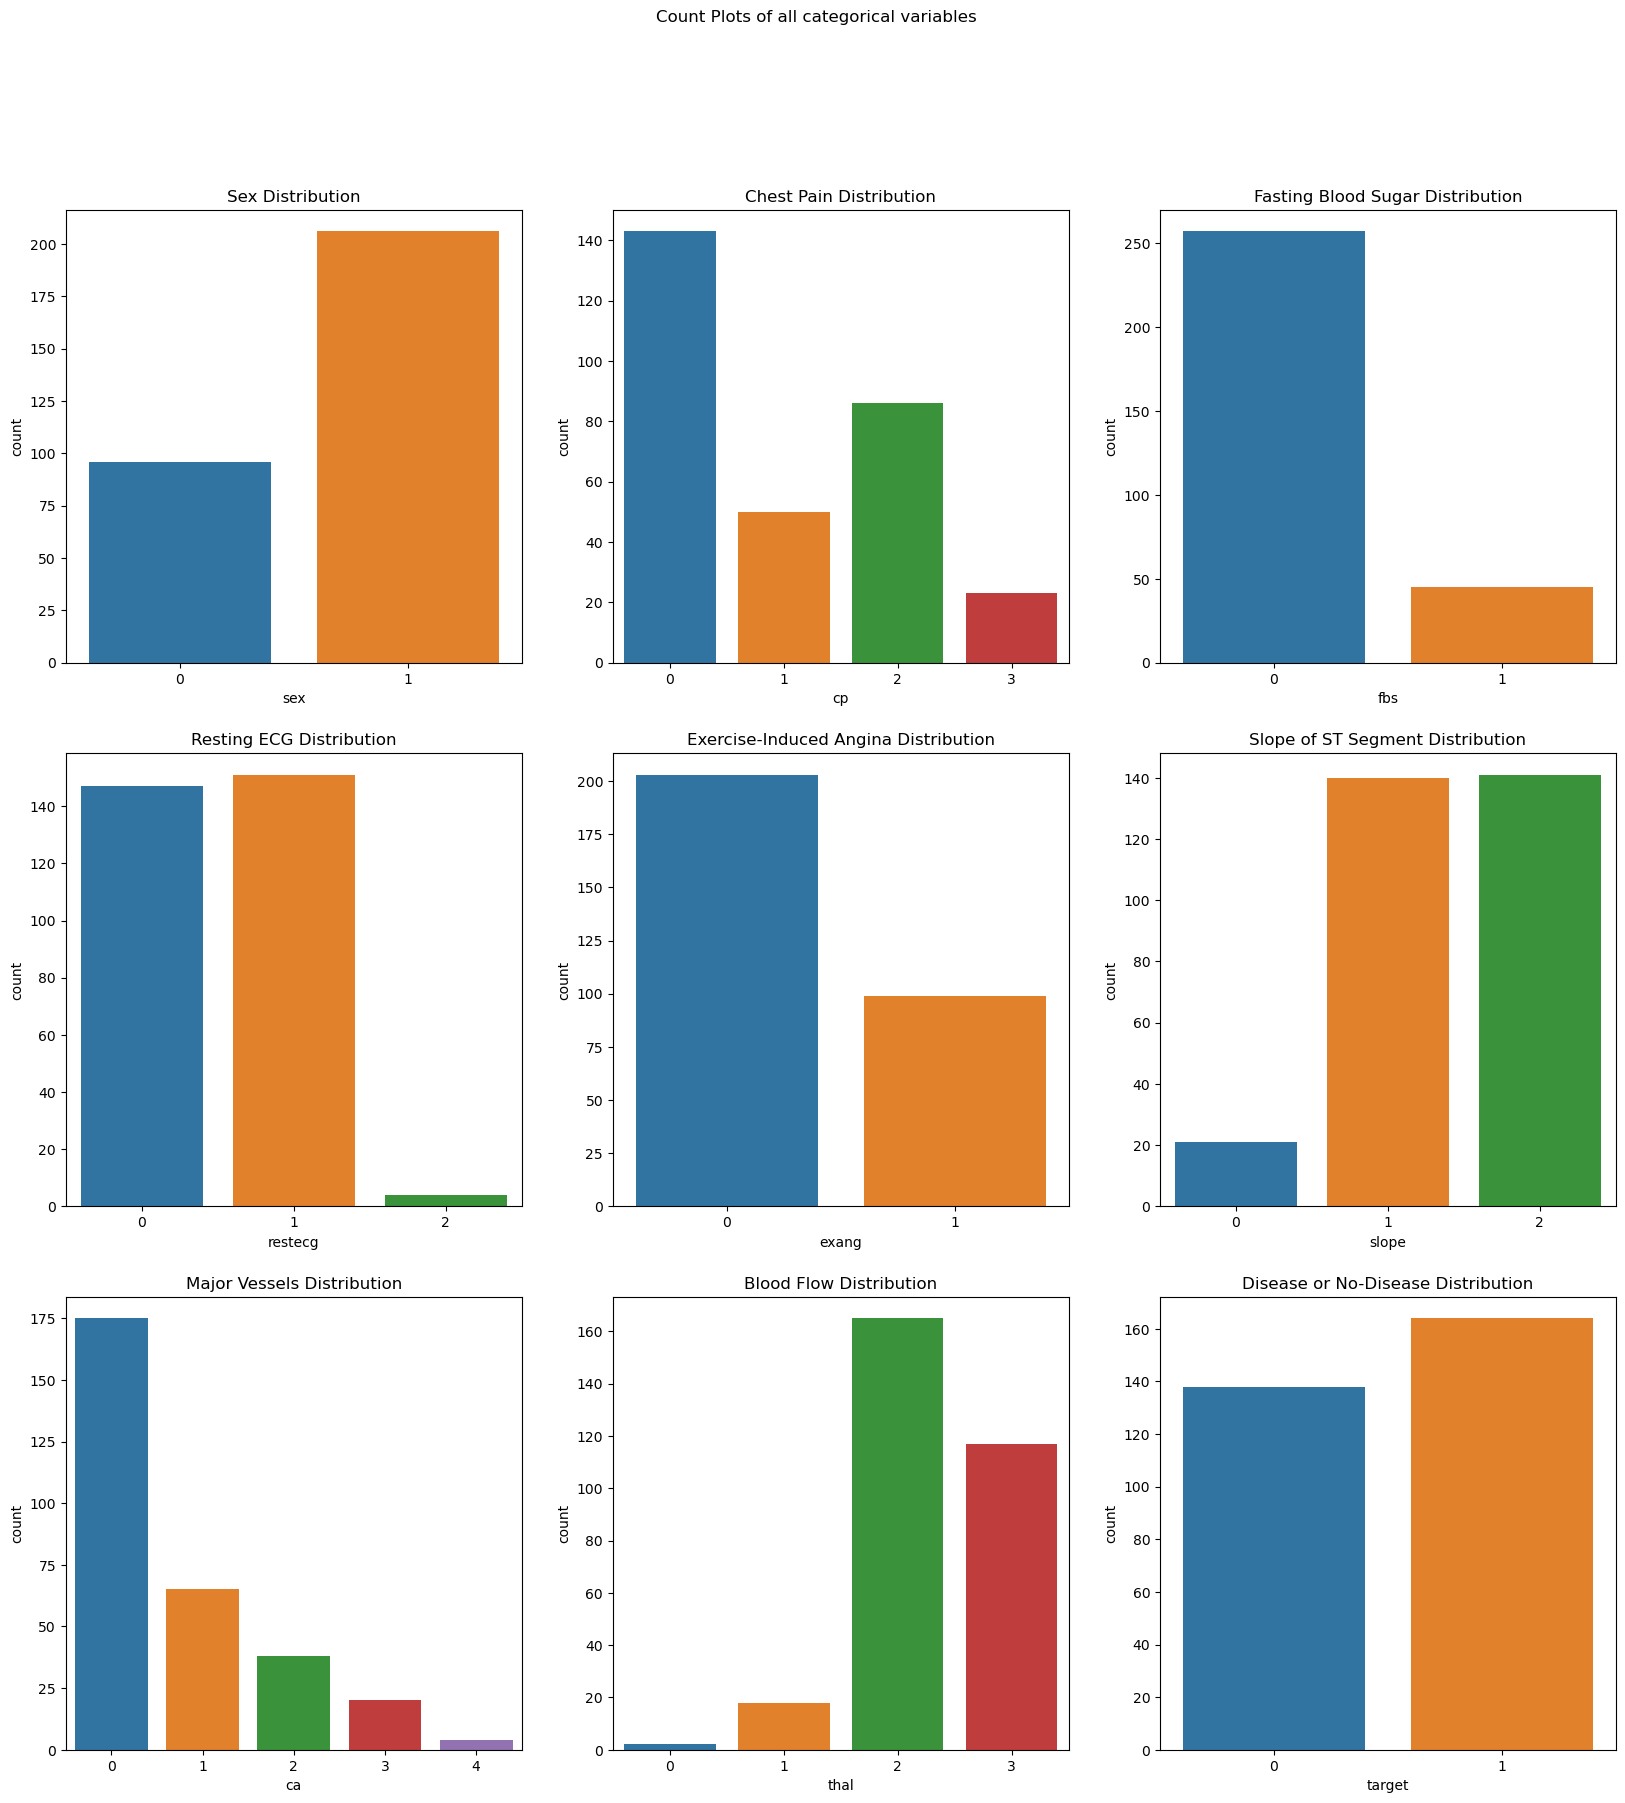

In [13]:
#visualizing the count plots (distributions) of all categorical variables

fig, axes = plt.subplots(3, 3, figsize=(20,20))
fig.suptitle('Count Plots of all categorical variables')

sns.countplot(ax=axes[0,0], data=data, x='sex')
axes[0,0].set_title('Sex Distribution')

sns.countplot(ax=axes[0,1], data=data, x='cp')
axes[0,1].set_title('Chest Pain Distribution')

sns.countplot(ax=axes[0,2], data=data, x='fbs')
axes[0,2].set_title('Fasting Blood Sugar Distribution')

sns.countplot(ax=axes[1,0], data=data, x="restecg")
axes[1,0].set_title('Resting ECG Distribution')

sns.countplot(ax=axes[1,1], data=data, x='exang')
axes[1,1].set_title('Exercise-Induced Angina Distribution')

sns.countplot(ax=axes[1,2], data=data, x='slope')
axes[1,2].set_title('Slope of ST Segment Distribution')

sns.countplot(ax=axes[2,0], data=data, x="ca")
axes[2,0].set_title('Major Vessels Distribution')

sns.countplot(ax=axes[2,1], data=data, x='thal')
axes[2,1].set_title('Blood Flow Distribution')

sns.countplot(ax=axes[2,2], data=data, x='target')
axes[2,2].set_title('Disease or No-Disease Distribution')


In [14]:
#here we can see the different distributions of categorical variables

Text(0.5, 1.0, 'Age Distribution per Disease Outcome')

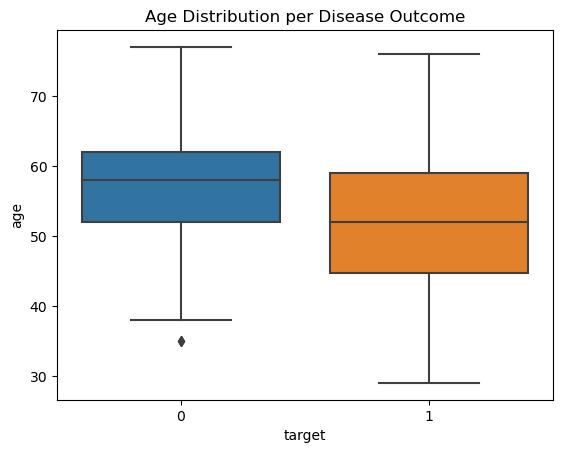

In [15]:
#occurence of CVD (target variable) across the Age category

#i want to make box plots of age with target as category

sns.boxplot(data=data, x='target', y='age')
plt.title('Age Distribution per Disease Outcome')

In [16]:
# diseased state (0) has a higher age distribution
# with a higher min, max, and mean

Text(0.5, 1.0, 'Female (0) vs Male (1) Distribution')

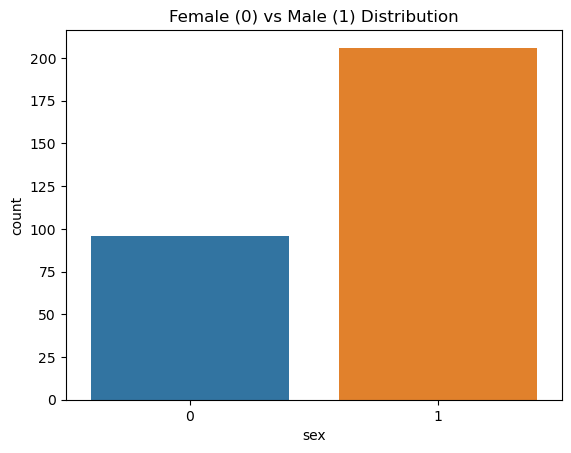

In [17]:
#visualizing the sex distribution: 0= CVD 1= no CVD
sns.countplot(data=data, x='sex')
plt.title("Female (0) vs Male (1) Distribution")

In [18]:
# there are more than twice as many men as women in this dataset
# this could be due to selection bias when gathering data/picking test subjects

Text(0.5, 1.0, 'Resting Heart Rate per Disease Outcome')

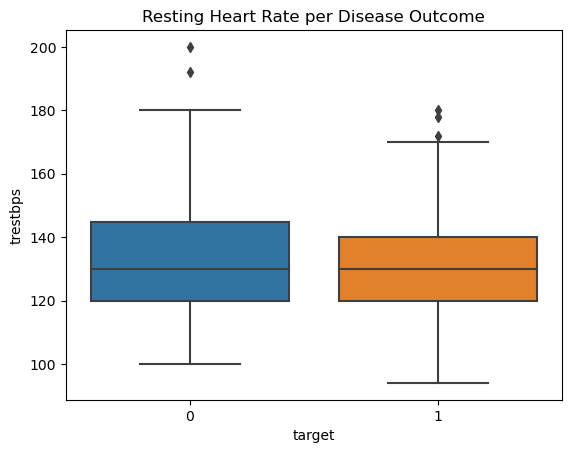

In [20]:
# can one detect heart attacks based on anomalies
# in the resting blood pressure (trestbps) of a patient?

#visualize distribution first, 0= CVD 1= no CVD

sns.boxplot(data=data, x='target', y='trestbps')
plt.title('Resting Heart Rate per Disease Outcome')

In [22]:
# it appears to be similarily distibuted
# heart disease outcome has higher outliers and a higher maximum

In [71]:
#defining outlier removal function

def remove_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3-Q1
    newdata = data.drop(data[(data<(Q1-1.5*IQR)) | (data>(Q3+1.5*IQR))].index)
    return newdata


In [72]:
#outlier treatment

#removing outliers from these graphs
restbpsdata0 = data['trestbps'][data['target']==0]
restbpsdata0 = remove_outliers(restbpsdata0)


restbpsdata1 = data['trestbps'][data['target']==1]
restbpsdata1 = remove_outliers(restbpsdata1)

#checking that outliers were removed
restbpsdata0.describe()

count    136.000000
mean     133.492647
std       17.283688
min      100.000000
25%      120.000000
50%      130.000000
75%      144.000000
max      180.000000
Name: trestbps, dtype: float64

In [74]:
#hypothesis testing with alternative hypothesis:
#mean of resting heartrate of heart attack incidences is higher than/not the same
#the mean of resting heartrate of no heart attack

tvalue, pvalue = stats.ttest_ind(a=restbpsdata0, b=restbpsdata1)
tvalue, pvalue

(2.738166684719393, 0.006553820512999133)

In [75]:
#since I'm looking to test whether mean of a is larger than mean of b
#I'm diving p-value by two and comparing to standard alpha = 0.05
#if smaller than 0.05

pvalue/2 <= 0.05

True

## Given that the p-value is smaller than alpha = 0.05, I can reject the null hypothesis that mean of Resting Heart Rate is the same regardless of Heart Attack Incidence

## This suggests there is a statistically significant relationship between Resting Heart Rate and Heart Attack Incidence

Text(0.5, 1.0, 'Cholesterol Distribution per Disease Outcome')

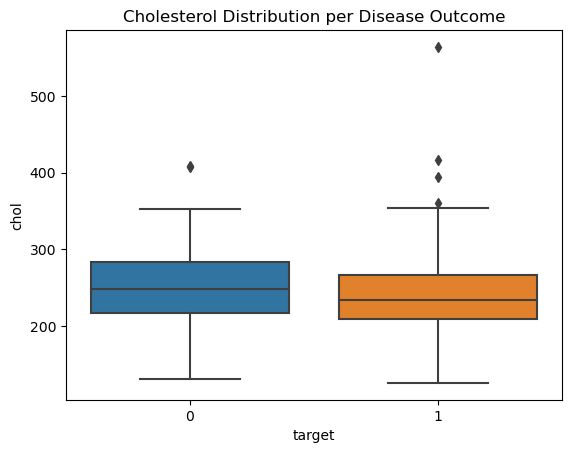

In [25]:
#describe the relationship between cholesterol levels 'chol' and
#the target variable 'target'


#visualize distribution first, 0= CVD 1= no CVD

sns.boxplot(data=data, x='target', y='chol')
plt.title('Cholesterol Distribution per Disease Outcome')

In [76]:
#outlier treatment

#removing outliers from these graphs
choldata0 = data['chol'][data['target']==0]
choldata0 = remove_outliers(choldata0)


choldata1 = data['chol'][data['target']==1]
choldata1 = remove_outliers(choldata1)

#checking that outliers were removed
choldata0.describe()

count    136.000000
mean     248.779412
std       45.954840
min      131.000000
25%      216.750000
50%      249.000000
75%      282.250000
max      353.000000
Name: chol, dtype: float64

In [77]:
#hypothesis test with alternative hypothesis:
#mean of cholesterol measurement with heart attack is higher than
#the mean of cholesterol measurement with no heart attack

tvalue, pvalue = stats.ttest_ind(a=choldata0, b=choldata1)
tvalue, pvalue

(2.113071436928353, 0.03543721653144441)

In [78]:
#since I'm looking to test whether mean of a is larger than mean of b
#I'm diving p-value by two and comparing to standard alpha = 0.05
#if smaller than 0.05

pvalue/2 <= 0.05

True

## Given that the p-value is smaller than alpha = 0.05, I can reject the null hypothesis that mean of Cholesterol Measurement is the same regardless of Heart Attack Incidence

## This suggests there is a statistically significant relationship between Cholesterol Levels and Heart Attack Incidence

Text(0.5, 1.0, 'No Heart Attack')

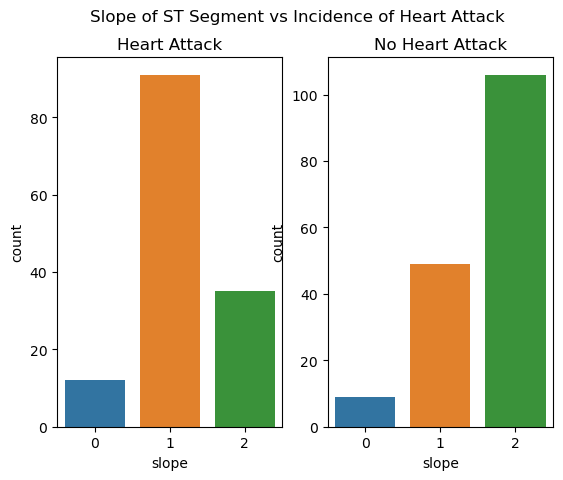

In [38]:
#state what relationship exists between peak exercising ('slope')and 
#the occurence of a heart attack ('target')


#visualize distribution first, 0= CVD 1= no CVD

fig, axes = plt.subplots(1, 2)
fig.suptitle('Slope of ST Segment vs Incidence of Heart Attack\n')


graph1=sns.countplot(ax=axes[0], data=data[data['target']==0], x='slope')
graph1.set_title('Heart Attack')


sns.countplot(ax=axes[1], data=data[data['target']==1], x='slope')
plt.title("No Heart Attack")

In [89]:
# 0: downsloping, 1: flat, 2: upsloping


# There were most heart attacks with flat ST Segments
# Most of those without heart attacks had upsloping ST Segments


#Chi squared test with null hypothesis stating 
#Slope of ST Segment at Peak Exercising has no relationship
#to heart attack incidence

contingency_table = pd.crosstab(data['slope'], data['target'])
contingency_table

chi2, pvalue, dof, expected = stats.chi2_contingency(contingency_table)
pvalue, expected

(6.577782760917924e-11,
 array([[ 9.59602649, 11.40397351],
        [63.97350993, 76.02649007],
        [64.43046358, 76.56953642]]))

## Given that the p-value is smaller than alpha = 0.05, I can reject the null hypothesis that states there is no relationship between ST Segment Slope at Peak Exercising and Heart Attack Incidence

## This suggests there is a statistically significant relationship between ST Segment Slope and Heart Attack Incidence

Text(0.5, 1.0, 'No Heart Attack')

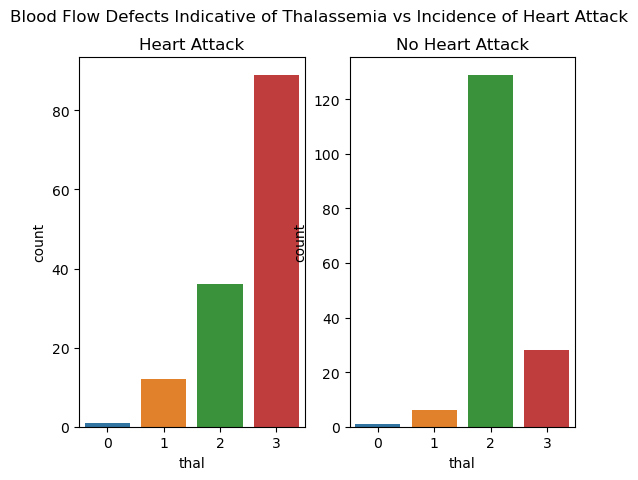

In [92]:
#value 1: fixed defect (no blood flow in some part of the heart)
#value 2: normal blood flow
#value 3: reversible defect (a blood flow is observed but it is not normal)


#is thalassemia ('thal') a major cause of heart attacks ('target')?



#visualize distribution first, 0= CVD 1= no CVD

fig, axes = plt.subplots(1, 2)
fig.suptitle('Blood Flow Defects Indicative of Thalassemia vs Incidence of Heart Attack\n')


graph1=sns.countplot(ax=axes[0], data=data[data['target']==0], x='thal')
graph1.set_title('Heart Attack')


sns.countplot(ax=axes[1], data=data[data['target']==1], x='thal')
plt.title("No Heart Attack")



Text(0.5, 1.0, 'No Heart Attack')

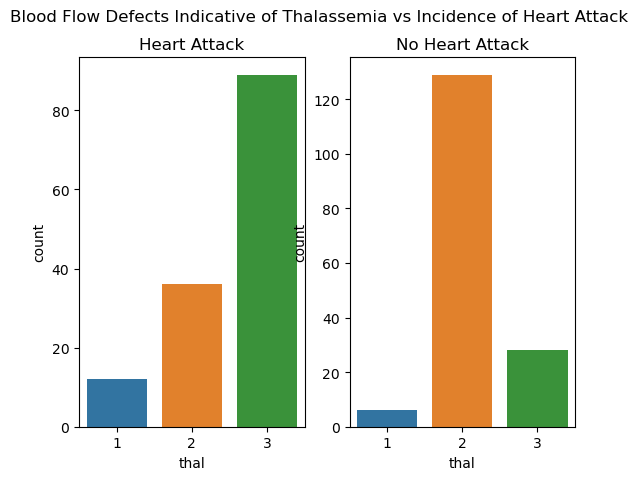

In [98]:
#there should be no 0 value in thal - we only have 1-3 defined
#dropping 0 values

data = data.drop(data[data['thal']==0].index)

#replotting to check

fig, axes = plt.subplots(1, 2)
fig.suptitle('Blood Flow Defects Indicative of Thalassemia vs Incidence of Heart Attack\n')


graph1=sns.countplot(ax=axes[0], data=data[data['target']==0], x='thal')
graph1.set_title('Heart Attack')


sns.countplot(ax=axes[1], data=data[data['target']==1], x='thal')
plt.title("No Heart Attack")

In [99]:
#Chi squared test with null hypothesis stating 
#there is no relationship between blood flow state indicative of thalassemia
#and heart attack incidence

contingency_table = pd.crosstab(data['thal'], data['target'])
contingency_table

chi2, pvalue, dof, expected = stats.chi2_contingency(contingency_table)
pvalue, expected

(4.251403205561942e-19,
 array([[ 8.22,  9.78],
        [75.35, 89.65],
        [53.43, 63.57]]))

## Given that the p-value is smaller than alpha = 0.05, I can reject the null hypothesis that states there is no relationship between Blood Flow State Indicative of Thalassemia and Heart Attack Incidence

## This suggests there is a statistically significant relationship between Blood Flow/Thalassemia and Heart Attack Incidence

In [113]:
#list how the other factors determine the ocurrence of CVD


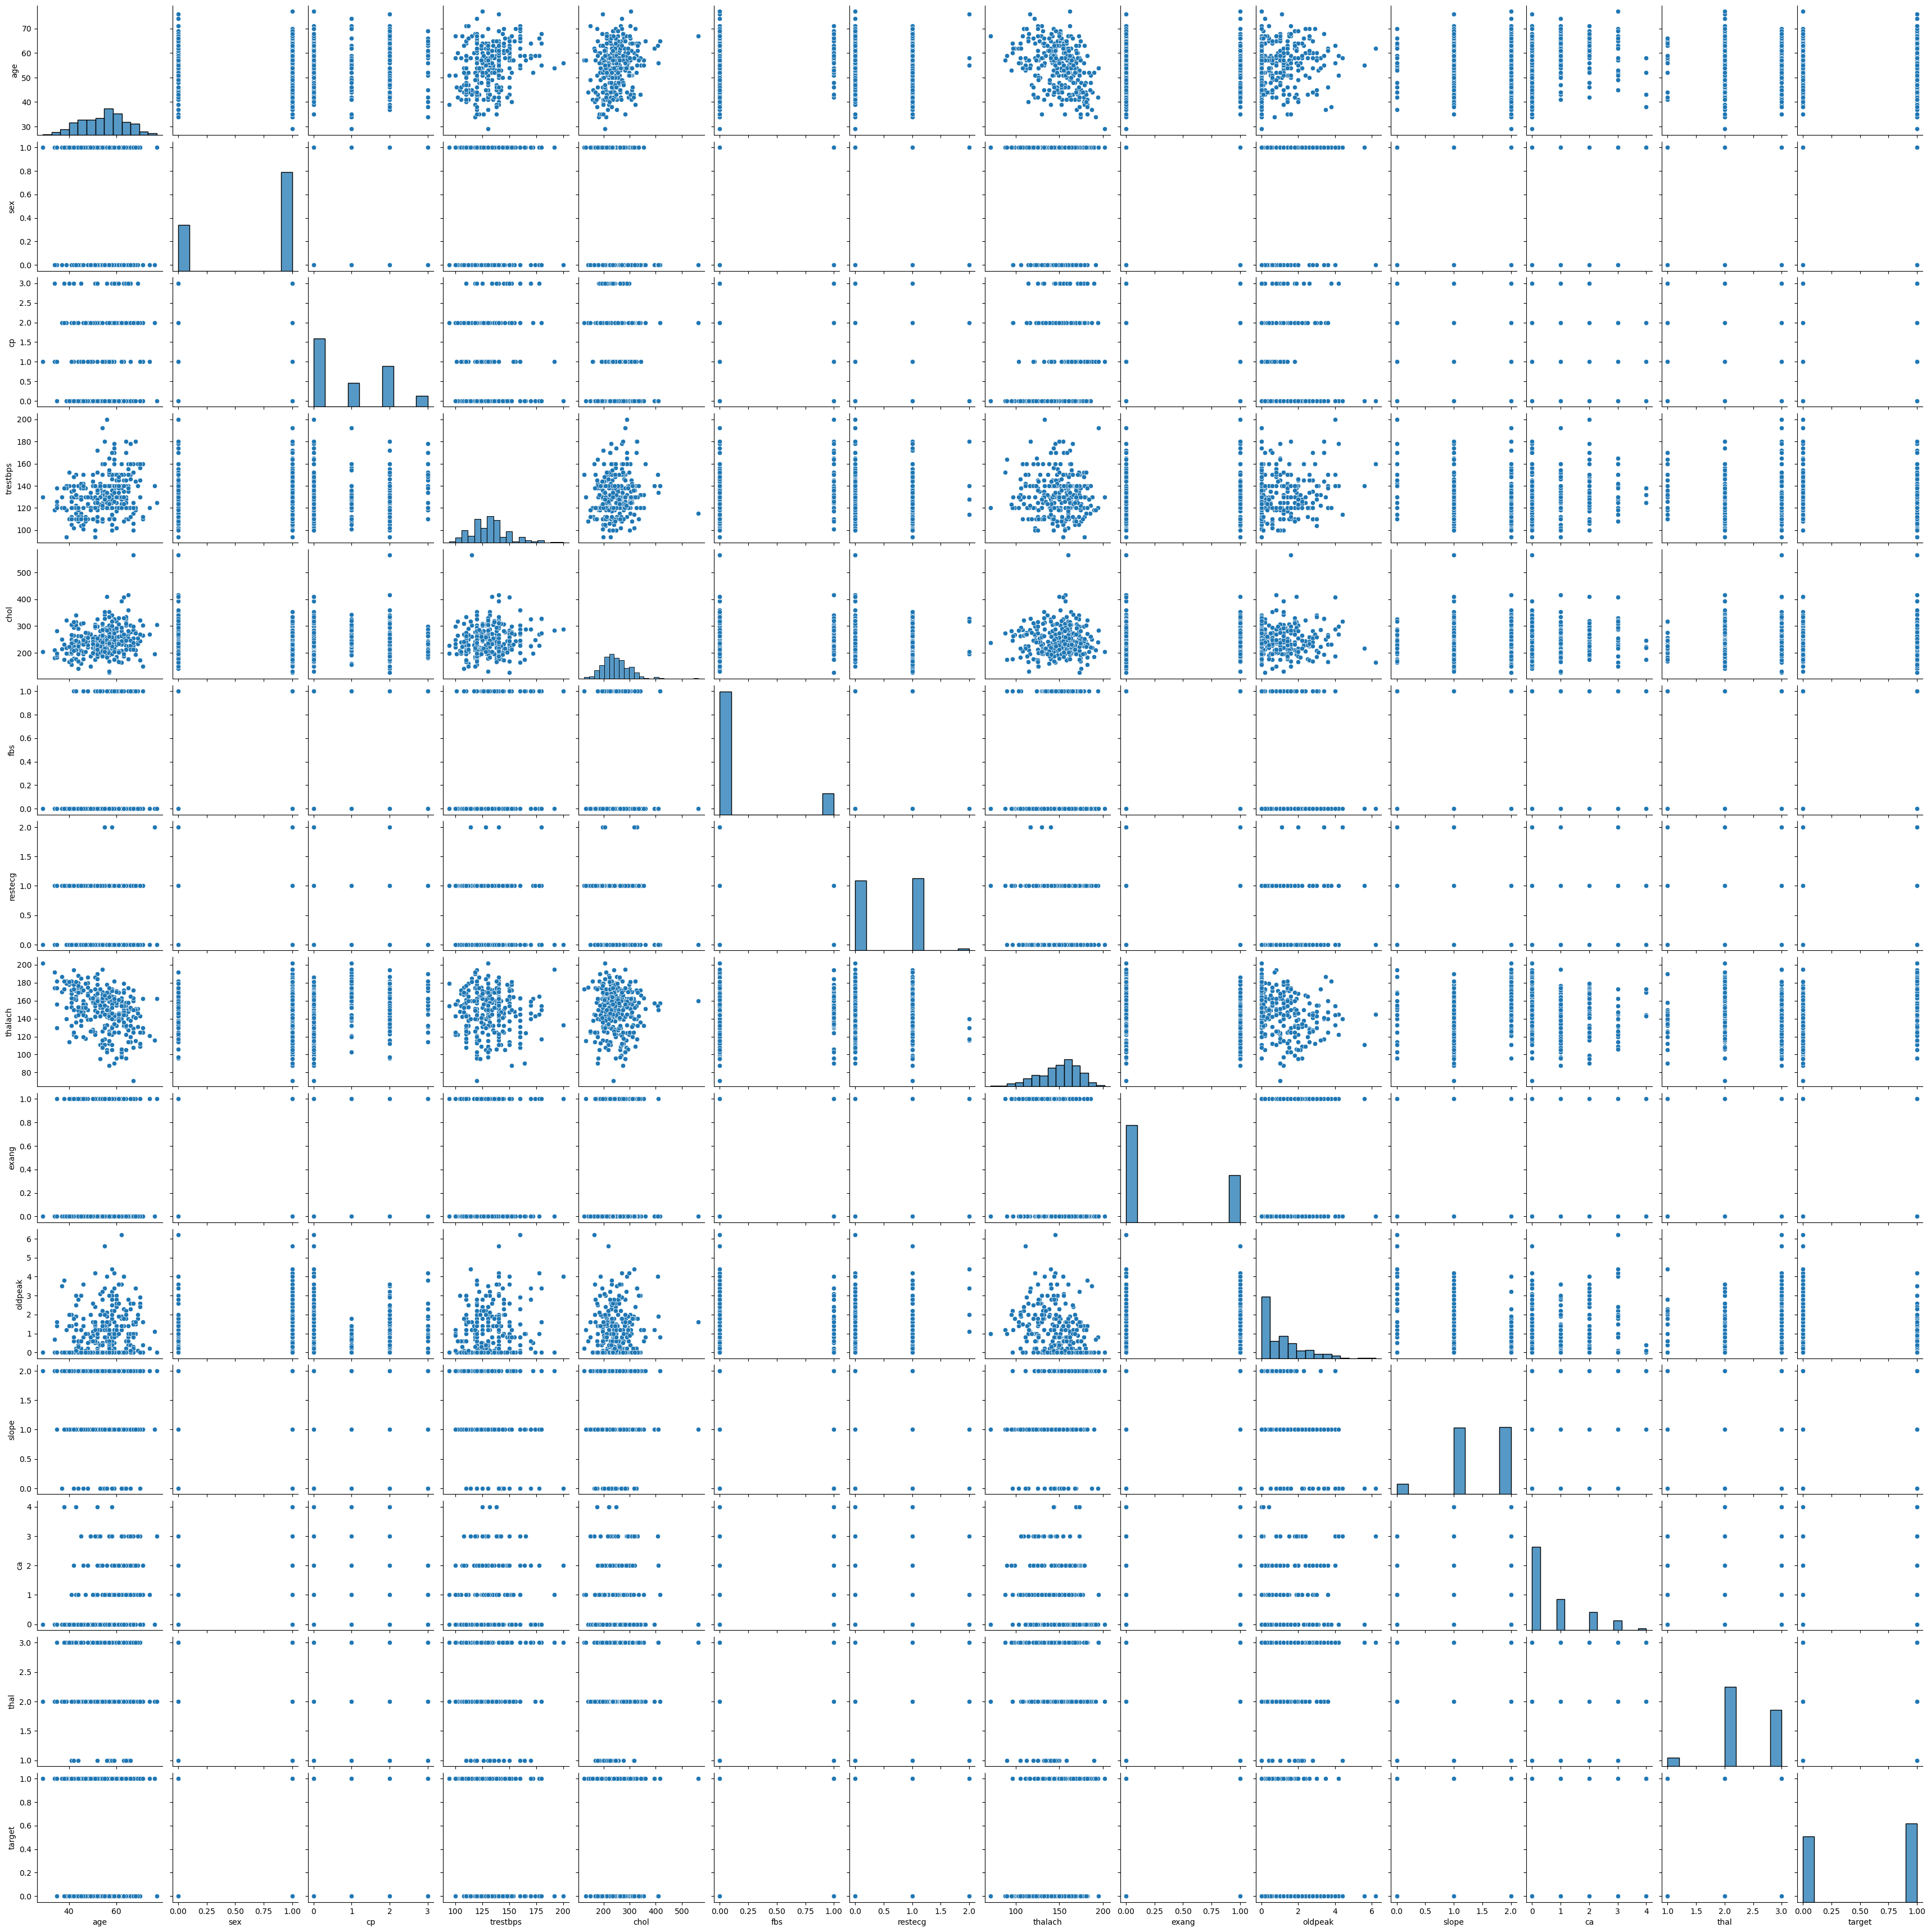

In [100]:
#pairplot to understand the relationship between all the given variables

sns.pairplot(data=data)

In [ ]:
#this plot is largely unreadable and since most variables are categorical
#it makes it difficult to gain anything from it

# Machine Learning Models without Feature Selection


In [142]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [143]:
#Logistic Regression Model

logReg = LogisticRegression()

X = data.drop(['target'], axis=1)
y = data['target']
y=y.astype('str')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

#Standardizing data

X_train = preprocessing.StandardScaler().fit_transform(X_train)

logReg.fit(X_train, y_train).score(X_train, y_train)

0.8584905660377359

### There is 85% accuracy in the Logistic Regression model.

In [168]:
#Random Forest Model


from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


X = data.drop(['target'], axis=1)
y = data['target']
y=y.astype('str')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

#Standardizing data

X_train = preprocessing.StandardScaler().fit_transform(X_train)

forest = RandomForestClassifier(n_estimators = 600)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=600)

In [169]:
#evaluating Random Forest

y_pred = forest.predict(X_test.values)

accuracy_score(y_test, y_pred)

0.7582417582417582

### There is 75% accuracy in the Random Forest model based on 600 trees.

In [171]:
confusion_matrix(y_test, y_pred)

array([[24, 15],
       [ 7, 45]], dtype=int64)

In [172]:
# confusion matrix is [true "heart attack" (TP), false "no heart attack" (FN)]
#                     [false "heart attack" (FP), true "no heart attack" (TN)]

### The confusion matrix had more false negatives than false positives. The RFC was more accurate predicting negative outcomes (no heart attack) with a True Negative Rate of 86.5% than positive outcomes with a True Positive Rate of 61.5%.

In [177]:
'''
Correlation analysis does not make sense in this dataset case
due to the fact that the 'target' variable is binary.

Correlation asserts a positive (both independent and dependent variables
incerase) or negative (as one variable increases, the other decreases)
relationship. Although this can be done to see the relationships
between the numerical variables within this dataset, ultimately, there is 
no way to correlate them to the target variable. 

'''

"\nCorrelation analysis does not make sense in this dataset case\ndue to the fact that the 'target' variable is binary.\n\nCorrelation asserts a positive (both independent and dependent variables\nincerase) or negative (as one variable increases, the other decreases)\nrelationship. Although this can be done to see the relationships\nbetween the numerical variables within this dataset, ultimately, there is \nno way to correlate them to the target variable. \n\n"

## Logistic Regression using statsmodels for feature selection. 

### I am doing this after modeling to check if there is a way to make the model more accurate by only including significant features based on p-values. Then I could redo the model.

In [197]:
# Logistic Regression using statsmodels for feature selection

import statsmodels.api as sm

#creating dummy variables for categorical variables
'''
categorical variables are:

sex
cp
fbs
restecg
exang
slope
ca
thal
target
'''
data.columns = data.columns.str.strip()

#data = pd.get_dummies(data , columns=['sex','cp','fbs','restecg','exang', 'slope','ca','thal'])

In [198]:
#I ran get_dummies above and using .head() clarified that it went through
#here, however running the above line now gives a keyerror

data.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [233]:

X = data.drop(['target'], axis=1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

#Standardizing data

#X_train = preprocessing.StandardScaler().fit_transform(X_train)

logreg = sm.Logit(y_train, X_train).fit()



         Current function value: 0.303916
         Iterations: 35


C:\Users\karol\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [234]:
print(logreg.summary())

                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  212
Model:                          Logit   Df Residuals:                      189
Method:                           MLE   Df Model:                           22
Date:                Sat, 15 Apr 2023   Pseudo R-squ.:                  0.5608
Time:                        12:13:44   Log-Likelihood:                -64.430
converged:                      False   LL-Null:                       -146.71
Covariance Type:            nonrobust   LLR p-value:                 8.213e-24
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0175      0.031      0.567      0.570      -0.043       0.078
trestbps      -0.0346      0.014     -2.481      0.013      -0.062      -0.007
chol          -0.0060      0.005     -1.220      0.2

In [235]:
'''
There are a lot of 1s and NaN's in p-values for dummy variables.
From research, this is due to there being a lot of ones or zeros in the
data, which makes sense given dummy variables. The problem could be that
there simply aren't enough datapoints to make a significant mean difference.
'''

"\nThere are a lot of 1s and NaN's in p-values for dummy variables.\nFrom research, this is due to there being a lot of ones or zeros in the\ndata, which makes sense given dummy variables. The problem could be that\nthere simply aren't enough datapoints to make a significant mean difference.\n"

### From this summary we can see that 'trestbps" aka Resting Heart Rate is a statistically sigificant in modeling this logistic regression.

### There doesn't appear to be any point in redoing the model due to the NaN and 1 p-values for the dummy categorical variables. However, this confirmed what was shown in a hypothesis test earlier about Resting Heart Rate being a significant predictor variable for Heart Attack Incidence.